# Kaggle入门：逻辑回归应用之Kaggle泰坦尼克之灾

**原文链接：http://blog.csdn.net/han_xiaoyang/article/details/49797143 在K-lab上进行实现，对机器学习和kaggle感兴趣的小伙伴，欢迎点击右上角「Fork」按钮自己进行运行调试！**

> 作者： 寒小阳 
> 出处：http://blog.csdn.net/han_xiaoyang/article/details/49797143 
> 声明：版权所有，转载请注明出处，谢谢。

Github链接：https://github.com/HanXiaoyang/Kaggle_Titanic

想要查看原文的可以点击上面CSDN的链接，~~不过CSDN上的图裂了，可以参考看一下这一篇 *七月在线实验室公众号* 的 [转载](https://mp.weixin.qq.com/s?__biz=MzI4MTQ2NjU5NA==&mid=2247483930&idx=1&sn=a4e1bdeaa8bae51509dff998b80cb6fd&chksm=eba98197dcde08819a0f7b0adeb003a7d66b4b64a0d81e56a2f31cf20f419addcef1a48ad0ef&mpshare=1&scene=23&srcid=1223q9TjVGDsR2E6TyalhBgo#rd)(有删改）~~

~~也可查看在[Internet Archive](https://archive.org/index.php)上的[20180203的快照](https://web.archive.org/web/20180203050426if_/https://blog.csdn.net/han_xiaoyang/article/details/49797143)(需要外网访问)。本文图片即是在这个快照上恢复过来的。~~
（原文图片已修复）

## 背景
### 关于Kaggle

*   [我是Kaggle地址，翻我牌子](https://www.kaggle.com/)
*   这就是那个无数『数据挖掘先驱』们，在回答”枪我有了，哪能找到靶子练练手啊？”时候的答案！
*   这是一个要数据有数据，要实际应用场景有场景，要一起在数据挖掘领域high得不要不要的小伙伴就有小伙伴的地方啊！！！

Kaggle是一个数据分析建模的应用竞赛平台，有点类似KDD-CUP（国际知识发现和数据挖掘竞赛），企业或者研究者可以将问题背景、数据、期望指标等发布到Kaggle上，以竞赛的形式向广大的数据科学家征集解决方案。而热爱数(dong)据(shou)挖(zhe)掘(teng)的小伙伴们可以下载/分析数据，使用统计/机器学习/数据挖掘等知识，建立算法模型，得出结果并提交，排名top的可能会有奖金哦！

### 关于泰坦尼克号之灾

- 带大家去该问题页面溜达一圈吧

 - 下面是问题背景页 
	
![问题背景页](https://www.z4a.net/images/2018/11/28/100.jpg)
	
 - 下面是可下载Data的页面 
![可下载Data的页面](https://www.z4a.net/images/2018/11/28/3c77dc7ee0957a2f3.jpg)
 - 下面是小伙伴们最爱的forum页面，你会看到各种神级人物厉(qi)害(pa)的数据处理/建模想法，你会直视『世界真奇妙』。 
![forum页面](https://www.z4a.net/images/2018/11/28/10047af6da58b79a1f2.jpg)
- 泰坦尼克号问题之背景

	- 就是那个大家都熟悉的『Jack and Rose』的故事，豪华游艇倒了，大家都惊恐逃生，可是救生艇的数量有限，无法人人都有，副船长发话了『lady and kid first！』，所以是否获救其实并非随机，而是基于一些背景有rank先后的。

	- 训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。

	- 对，这是一个二分类问题，是我们之前讨论的logistic regression所能处理的范畴。
	
## 说明
接触过Kaggle的同学们可能知道这个问题，也可能知道RandomForest和SVM等等算法，甚至还对多个模型做过融合，取得过非常好的结果，那maybe这篇文章并不是针对你的，你可以自行略过。

我们因为之前只介绍了Logistic Regression这一种分类算法。所以本次的问题解决过程和优化思路，都集中在这种算法上。其余的方法可能我们之后的文章里会提到。

说点个人的观点。不一定正确。 
『解决一个问题的方法和思路不止一种』 
『没有所谓的机器学习算法优劣，也没有绝对高性能的机器学习算法，只有在特定的场景、数据和特征下更合适的机器学习算法。』

## 怎么做？
手把手教程马上就来，先来两条我看到的，觉得很重要的经验。

印象中Andrew Ng老师似乎在coursera上说过，应用机器学习，千万不要一上来就试图做到完美，先撸一个baseline的model出来，再进行后续的分析步骤，一步步提高，所谓后续步骤可能包括『分析model现在的状态(欠/过拟合)，分析我们使用的feature的作用大小，进行feature selection，以及我们模型下的bad case和产生的原因』等等。

Kaggle上的大神们，也分享过一些experience，说几条我记得的哈：

『对数据的认识太重要了！』
『数据中的特殊点/离群点的分析和处理太重要了！』
『特征工程(feature engineering)太重要了！在很多Kaggle的场景下，甚至比model本身还要重要』
『要做模型融合(model ensemble)啊啊啊！』

## 初探数据
先看看我们的数据，长什么样吧。在Data下我们train.csv和test.csv两个文件，分别存着官方给的训练和测试数据。

pandas是常用的python数据处理包，把csv文件读入成dataframe各式，我们在ipython notebook中，看到data_train如下所示：

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
#https://stackoverflow.com/q/40845304/10704205
#Ignore RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv('./data/train.csv',engine = 'python',encoding='UTF-8')
data_train.head() #dataframe格式

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


这就是典型的dataframe格式，如果你没接触过这种格式，完全没有关系，你就把它想象成Excel里面的列好了。 
我们看到，总共有12列，其中Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：

- PassengerId => 乘客ID
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

逐条往下看，要看完这么多条，眼睛都有一种要瞎的赶脚。好吧，我们让dataframe自己告诉我们一些信息，如下所示：

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


上面的数据说啥了？它告诉我们，训练数据中总共有891名乘客，但是很不幸，我们有些属性的数据不全，比如说：

- Age（年龄）属性只有714名乘客有记录
- Cabin（客舱）更是只有204名乘客是已知的

似乎信息略少啊，想再瞄一眼具体数据数值情况呢？恩，我们用下列的方法，得到数值型数据的一些分布(因为有些属性，比如姓名，是文本型；而另外一些属性，比如登船港口，是类目型。这些我们用下面的函数是看不到的)：


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


我们从上面看到更进一步的什么信息呢？ 
mean字段告诉我们，大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁(计算这个时候会略掉无记录的)等等…

## 数据初步分析

每个乘客都这么多属性，那我们咋知道哪些属性更有用，而又应该怎么用它们啊？说实话这会儿我也不知道，但我们记得前面提到过

**- 『对数据的认识太重要了！』**

**- 『对数据的认识太重要了！』**

**- 『对数据的认识太重要了！』**

重要的事情说三遍，恩，说完了。仅仅最上面的对数据了解，依旧无法给我们提供想法和思路。我们再深入一点来看看我们的数据，看看每个/多个 属性和最后的Survived之间有着什么样的关系呢。

### 乘客各属性分布

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\li

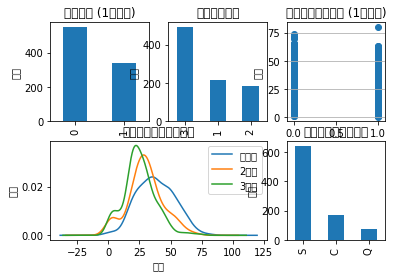

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

我们在图上可以看出来，被救的人300多点，不到半数；3等舱乘客灰常多；遇难和获救的人年龄似乎跨度都很广；3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多(→_→似乎符合财富和年龄的分配哈，咳咳，别理我，我瞎扯的)；登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。

我们可能会有一些想法了：

- 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样

- 年龄对获救概率也一定是有影响的，毕竟前面说了，副船长还说『小孩和女士先走』呢

- 和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？

口说无凭，空想无益。老老实实再来统计统计，看看这些属性值的统计分布吧。

### 属性与获救结果的关联统计

#### 看看各乘客等级的获救情况

<Figure size 432x288 with 0 Axes>

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0, flags=flags)


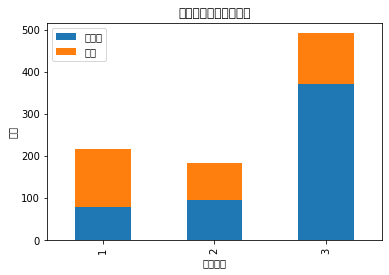

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'未获救':Survived_0,u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

明显等级为1的乘客，获救的概率高很多。恩，这个一定是影响最后获救结果的一个特征。

#### 看看各性别的获救情况

<Figure size 432x288 with 0 Axes>

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\si

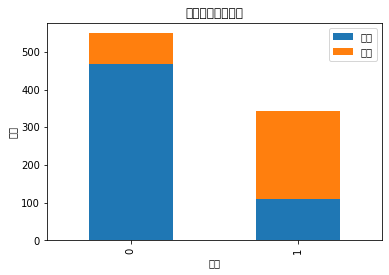

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

歪果盆友果然很尊重lady，lady first践行得不错。性别无疑也要作为重要特征加入最后的模型之中。

再来个详细版的好了。

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\li

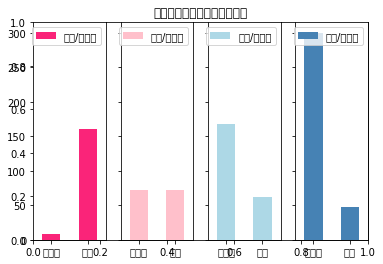

In [7]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticks([0,1])
ax1.set_xticklabels([u"未获救", u"获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

#### 我们看看各登船港口的获救情况

<Figure size 432x288 with 0 Axes>

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\li

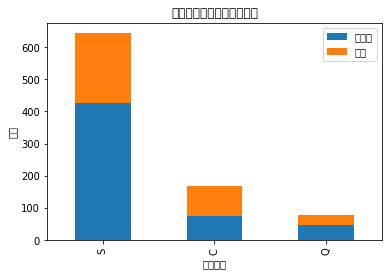

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'未获救':Survived_0,u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口") 
plt.ylabel(u"人数") 

plt.show()

#### 看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响

In [9]:
gg = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(gg.count()['PassengerId'])
print(df)

gp = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(gp.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


好吧，没看出特别特别明显的规律(为自己的智商感到捉急…)，先作为备选特征，放一放。

#### tickets cabin的分析
ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴

cabin只有204个乘客有值，我们先看看它的一个分布

In [10]:
data_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
E101           3
C22 C26        3
D              3
C78            2
C52            2
B28            2
C65            2
E8             2
B5             2
B49            2
D33            2
C93            2
C68            2
B18            2
B77            2
E121           2
B51 B53 B55    2
B22            2
E44            2
C123           2
D20            2
F4             2
C124           2
D26            2
D35            2
              ..
D6             1
B3             1
C46            1
D21            1
B80            1
C128           1
E31            1
D46            1
B86            1
B50            1
F38            1
D9             1
E12            1
C32            1
E77            1
C104           1
C50            1
A31            1
C99            1
D10 D12        1
C87            1
B19            1
E10            1
E58            1
C85            1
D7             1
B30            1
E63           

这三三两两的…如此不集中…我们猜一下，也许，前面的ABCDE是指的甲板位置、然后编号是房间号？…好吧，我瞎说的，别当真…

关键是Cabin这鬼属性，应该算作类目型的，本来缺失值就多，还如此不集中，注定是个棘手货…第一感觉，这玩意儿如果直接按照类目特征处理的话，太散了，估计每个因子化后的特征都拿不到什么权重。加上有那么多缺失值，要不我们先把Cabin缺失与否作为条件(虽然这部分信息缺失可能并非未登记，maybe只是丢失了而已，所以这样做未必妥当)，先在有无Cabin信息这个粗粒度上看看Survived的情况好了。

<Figure size 432x288 with 0 Axes>

e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26377 missing from current font.
  font.load_char(ord(s), flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26080 missing from current font.
  font.load_char(ord(s), flags=flags)
e:\liaopython\

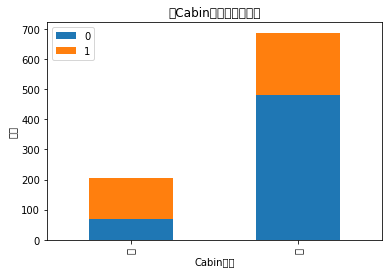

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

有Cabin记录的似乎获救概率稍高一些，先这么着放一放吧。

## 简单数据预处理
大体数据的情况看了一遍，对感兴趣的属性也有个大概的了解了。 
下一步干啥？咱们该处理处理这些数据，为机器学习建模做点准备了。

对了，我这里说的数据预处理，其实就包括了很多Kaggler津津乐道的feature engineering过程，灰常灰常有必要！

- **『特征工程(feature engineering)太重要了！』 **
- **『特征工程(feature engineering)太重要了！』 **
- **『特征工程(feature engineering)太重要了！』 **

恩，重要的事情说三遍。

先从最突出的数据属性开始吧，对，Cabin和Age，有丢失数据实在是对下一步工作影响太大。

先说Cabin，暂时我们就按照刚才说的，按Cabin有无数据，将这个属性处理成Yes和No两种类型吧。

再说Age：

通常遇到缺值的情况，我们会有几种常见的处理方式

如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法，我们之后会介绍到)


In [12]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [13]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


恩。目的达到，OK了。

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化。 
什么叫做因子化呢？举个例子：

以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性

原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1
我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。

In [14]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


bingo，我们很成功地把这些类目属性全都转成0，1的数值属性了。

这样，看起来，是不是我们需要的属性值都有了，且它们都是数值型属性呢。

有一种临近结果的宠宠欲动感吧，莫急莫急，我们还得做一些处理，仔细看看Age和Fare两个属性，乘客的数值幅度变化，也忒大了吧！！如果大家了解逻辑回归与梯度下降的话，会知道，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！ (╬▔皿▔)…所以我们先用scikit-learn里面的preprocessing模块对这俩货做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。

In [15]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337


恩，好看多了，万事俱备，只欠建模。马上就要看到成效了，哈哈。我们把需要的属性值抽出来，转成scikit-learn里面LogisticRegression可以处理的格式。
## 逻辑回归建模
我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [16]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

good，很顺利，我们得到了一个model。

先淡定！淡定！你以为把test.csv直接丢进model里就能拿到结果啊…骚年，图样图森破啊！我们的”test_data”也要做和”train_data”一样的预处理啊！！

In [18]:
data_test = pd.read_csv("./data/test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740


不错不错，数据很OK，差最后一步了。 
下面就做预测取结果吧！！

In [21]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("./output/Kaggle_Titanic_output.csv", index=False)

In [22]:
pd.read_csv("./output/Kaggle_Titanic_output.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1



啧啧，挺好，格式正确，去make a submission啦啦啦！

在Kaggle的Make a submission页面，提交上结果。如下： 

![提交结果](https://www.z4a.net/images/2018/11/28/result_2.jpg)

0.76555，恩，结果还不错。毕竟，这只是我们简单分析处理过后出的一个baseline模型嘛。

## 逻辑回归系统优化
### 模型系数关联分析
亲，你以为结果提交上了，就完事了？ 
我不会告诉你，这只是万里长征第一步啊(泪牛满面)！！！这才刚撸完baseline model啊！！！还得优化啊！！！

看过Andrew Ng老师的machine Learning课程的同学们，知道，我们应该分析分析模型现在的状态了，是过/欠拟合？，以确定我们需要更多的特征还是更多数据，或者其他操作。我们有一条很著名的learning curves对吧。

不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还有些粗糙，先再挖掘挖掘。

首先，Name和Ticket两个属性被我们完整舍弃了(好吧，其实是因为这俩属性，几乎每一条记录都是一个完全不同的值，我们并没有找到很直接的处理方式)。

然后，我们想想，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好地拟合预测出未知的年龄。再一个，以我们的日常经验，小盆友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更合适一些。

上面只是我瞎想的，who knows是不是这么回事呢，老老实实先把得到的model系数和feature关联起来看看。

**LR模型系数：**

In [23]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3442358052428168]
1,Parch,[-0.10491594519913373]
2,Cabin_No,[-0.054398337799513606]
3,Cabin_Yes,[0.8477082702353712]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726495084795534]
7,Sex_female,[2.010971481553275]
8,Sex_male,[-0.623020600710926]
9,Pclass_1,[0.3411594144519839]


首先，大家回去前两篇文章里瞄一眼公式就知道，这些系数为正的特征，和最后结果是一个正相关，反之为负相关。

我们先看看那些权重绝对值非常大的feature，在我们的模型上：

- Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
- Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
- 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
- Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
- 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
- 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

噢啦，观察完了，我们现在有一些想法了，但是怎么样才知道，哪些优化的方法是promising的呢？

因为test.csv里面并没有Survived这个字段(好吧，这是废话，这明明就是我们要预测的结果)，我们无法在这份数据上评定我们算法在该场景下的效果…

而『每做一次调整就make a submission，然后根据结果来判定这次调整的好坏』其实是行不通的…

### 交叉验证

重点又来了：

- **『要做交叉验证(cross validation)!』 **
- **『要做交叉验证(cross validation)!』 **
- **『要做交叉验证(cross validation)!』 **

恩，重要的事情说三遍。我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。

先简单看看cross validation情况下的打分


In [24]:
# from sklearn import cross_validation
# 参考https://blog.csdn.net/cheneyshark/article/details/78640887 ， 0.18版本中，cross_validation被废弃
# 改为下面的从model_selection直接import cross_val_score 和 train_test_split
from sklearn.model_selection import cross_val_score, train_test_split

 #简单看看打分情况
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]
# print(cross_validation.cross_val_score(clf, X, y, cv=5))
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


结果是下面酱紫的： 
[0.81564246 0.81005587 0.78651685 0.78651685 0.81355932]

似乎比Kaggle上的结果略高哈，毕竟用的是不是同一份数据集评估的。

等等，既然我们要做交叉验证，那我们干脆先把交叉验证里面的bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是我们忽略了哪些信息，使得这些乘客被判定错了。再把bad case上得到的想法和前头系数分析的合在一起，然后逐个试试。

下面我们做数据分割，并且在原始数据集上瞄一眼bad case：

In [25]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
# split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("./data/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


大家可以自己跑一遍试试，拿到bad cases之后，仔细看看。也会有一些猜测和想法。其中会有一部分可能会印证在系数分析部分的猜测，那这些优化的想法优先级可以放高一些。

现在有了”train_df” 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作：

- Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
- Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
- Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
- Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
- 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
- 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
- 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
- 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
- Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

试验的过程比较漫长，也需要有耐心，而且我们经常会面临很尴尬的状况，就是我们灵光一闪，想到一个feature，然后坚信它一定有效，结果试验下来，效果还不如试验之前的结果。恩，需要坚持和耐心，以及不断的挖掘。

我最好的结果是在『Survived~C(Pclass)+C(Title)+C(Sex)+C(Age_bucket)+C(Cabin_num_bucket)Mother+Fare+Family_Size』下取得的，结果如下(抱歉，博主君commit的时候手抖把页面关了，于是没截着图，下面这张图是在我得到最高分之后，用这次的结果重新make commission的，截了个图，得分是0.79426，不是目前我的最高分哈，因此排名木有变…)：

![做完feature engineering调整之后的结果](https://www.z4a.net/images/2018/11/28/result_3.jpg)

### learning curves

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。

额，这个欠拟合和过拟合怎么解释呢。这么说吧：

- 过拟合就像是你班那个学数学比较刻板的同学，老师讲过的题目，一字不漏全记下来了，于是老师再出一样的题目，分分钟精确出结果。but数学考试，因为总是碰到新题目，所以成绩不咋地。
- 欠拟合就像是，咳咳，和博主level差不多的差生。连老师讲的练习题也记不住，于是连老师出一样题目复习的周测都做不好，考试更是可想而知了。
而在机器学习的问题上，对于过拟合和欠拟合两种情形。我们优化的方式是不同的。

对过拟合而言，通常以下策略对结果优化是有用的：

- 做一下feature selection，挑出较好的feature的subset来做training
- 提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确
而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。

著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)

![过拟合](https://www.z4a.net/images/2018/11/28/high_variance.jpg)
![欠拟合](https://www.z4a.net/images/2018/11/28/10067a39f8c5849405a.jpg)

我们也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。

回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。


e:\liaopython\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\liaopython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35757 mi

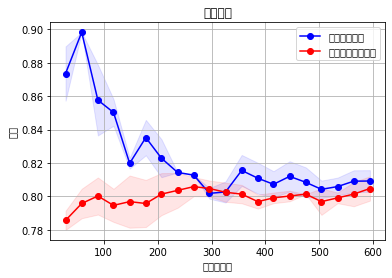

(0.8065696844854024, 0.018258876711338634)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

在实际数据上看，我们得到的learning curve没有理论推导的那么光滑哈，但是可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

## 模型融合(model ensemble)

好了，终于到这一步了，我们要祭出机器学习/数据挖掘上通常最后会用到的大杀器了。恩，模型融合。

『强迫症患者』打算继续喊喊口号… 

- **『模型融合(model ensemble)很重要！』 **
- **『模型融合(model ensemble)很重要！』 **
- **『模型融合(model ensemble)很重要！』 **

重要的事情说三遍，恩，噢啦。

先解释解释，一会儿再回到我们的问题上哈。 
啥叫模型融合呢，我们还是举几个例子直观理解一下好了。

大家都看过知识问答的综艺节目中，求助现场观众时候，让观众投票，最高的答案作为自己的答案的形式吧，每个人都有一个判定结果，最后我们相信答案在大多数人手里。

再通俗一点举个例子。你和你班某数学大神关系好，每次作业都『模仿』他的，于是绝大多数情况下，他做对了，你也对了。突然某一天大神脑子犯糊涂，手一抖，写错了一个数，于是…恩，你也只能跟着错了。 
我们再来看看另外一个场景，你和你班5个数学大神关系都很好，每次都把他们作业拿过来，对比一下，再『自己做』，那你想想，如果哪天某大神犯糊涂了，写错了，but另外四个写对了啊，那你肯定相信另外4人的是正确答案吧？

最简单的模型融合大概就是这么个意思，比如分类问题，当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)，那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

bingo，问题就这么完美的解决了。

模型融合可以比较好地缓解，训练过程中产生的过拟合问题，从而对于结果的准确度提升有一定的帮助。

话说回来，回到我们现在的问题。你看，我们现在只讲了logistic regression，如果我们还想用这个融合思想去提高我们的结果，我们该怎么做呢？

既然这个时候模型没得选，那咱们就在数据上动动手脚咯。大家想想，如果模型出现过拟合现在，一定是在我们的训练上出现拟合过度造成的对吧。

那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。

我们用scikit-learn里面的Bagging来完成上面的思路，过程非常简单。代码如下：

In [27]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("./output/Kaggle_Titanic_output2.csv", index=False)

In [28]:
pd.read_csv("./output/Kaggle_Titanic_output2.csv").head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


然后你再Make a submission，恩，发现对结果还是有帮助的。

![ensemble之后的结果](https://www.z4a.net/images/2018/11/28/10063240f91a36cc150.jpg)

## 总结
文章稍微有点长，非常感谢各位耐心看到这里。 
总结的部分，我就简短写几段，出现的话，很多在文中有对应的场景，大家有兴趣再回头看看。

对于任何的机器学习问题，不要一上来就追求尽善尽美，先用自己会的算法撸一个baseline的model出来，再进行后续的分析步骤，一步步提高。

在问题的结果过程中：

- **『对数据的认识太重要了！』**
- **『数据中的特殊点/离群点的分析和处理太重要了！』**
- **『特征工程(feature engineering)太重要了！』**
- **『模型融合(model ensemble)太重要了！』**

本文中用机器学习解决问题的过程大概如下图所示： 

![用机器学习解决问题的过程](https://www.z4a.net/images/2018/11/28/100f3a39031e73bd0a8.jpg)